# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [8]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Matt\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


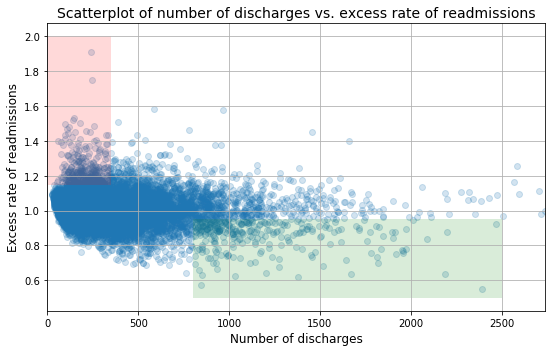

In [11]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Part A

I disagree with the results of the preliminary analysis for multiple reasons:
1. The statistics provided do not appear to have been tested for significance. It is possible that the rate of readmissions is equal for small and large hospitals and that the sample means differ by chance.
2. The strength of the correlation has not been quantified, nor has it definitively been shown as negative.
3. Other important factors that would lead to readmissions have not been considered, such as the types of conditions that are being treated.
4. The policy recommendation may adversely impact access to healthcare since there would be less facilities, which may mean longer average travel times and wait times.

#### Part B
I will start by defining the null hypothesis: the hospital's capacity measured in the number of discharges has no impact on the excess rate of readmissions.

In [15]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [25]:
#Compute line of best fit for discharges and excess readmissions as well as Pearson correlation coefficient
slope, intercept = np.polyfit(x, y, deg=1)
r = np.corrcoef(x, y)[0,1]
print('Slope:' , slope)
print('Intercept: ', intercept)
print('Pearson r: ', r)

Slope: -2.85650529438e-05
Intercept:  1.01794755795
Pearson r:  -0.0930955428759


Number of discharges appears to be negatively correlated with excess rate of readmissions, however this correlation is weak.

In [28]:
#Conduct hypothesis test on correlation
perm_replicates = np.empty(10000)
for i in range(10000):
    discharges_permuted = np.random.choice(x, len(x))
    perm_replicates[i] = np.corrcoef(discharges_permuted, y)[0,1]
p_corr = np.sum(perm_replicates <= r) / len(perm_replicates)
print('P-value :', p_corr)

P-value : 0.0


Simulating the experiment 10,000 times and calculating the correlation for each one, not a single replicate had a Pearson correlation coefficient at least as strongly negative as the one observed. Since the p-value calculated is 0, this correlation would be considered statistically significant at our $\alpha$ of 0.01.

It is important to note the difference between statistical significance and *practical* significance here, as the slope of the best fit line is barely negative. This means that the excess rate of readmissions changes very little with the capacity of the facility and therefore making any policy recommendation based on the facility's capacity may be ineffective.

Since consolidating hospitals would most likely cause increases to average travel time/distance to the nearest hospital and only decrease readmissions by a small margin if at all, I would not recommend this approach. Instead, I would consider comparing hospitals of similar sizes and using the top performing hospitals in each size group as examples for underperforming facilities to follow.

#### Plotting the data
The scatterplot that was used to visualize the data gave immediate visibility to the large cluster of data near the average readmission rate of 1 as well as the outliers. However, the plot leaves the viewer guessing whether there is a correlation of any sort and the green and red-shaded areas don't appear to truly capture the full picture of good and bad hospitals, respectively.

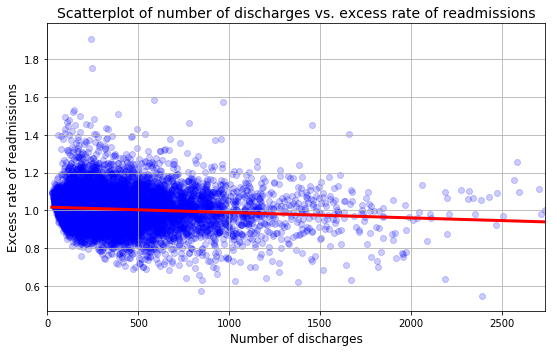

In [52]:
#Construct another plot
y_pred = [i * slope + intercept for i in x]
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2, color='blue')
plt.plot(x, y_pred, linewidth=3, color='red')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()